In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd
import uproot

In [2]:
url = 'https://gist.githubusercontent.com/bonanomi/d14780f7562cb2a22fdd753a9d4459d4/raw/b3c6d77505b90eb38a886c19a31725df8ceb908f/MyMPLStyle'
plt.style.use(url)

In [3]:
tree = 'Events'
fname = '/eos/user/m/mbonanom/nanoAOD_ggH_ZZ_4L.root'
branches = ['HTXS_stage_1_pTjet30', 'LHEScaleWeight']

In [4]:
evt = uproot.open(fname)[tree]
evts = evt.arrays(branches)

In [5]:
binning = np.linspace(0, 500, 500)

In [6]:
h_stxs = np.histogram(evts[b'HTXS_stage_1_pTjet30'], binning)

In [7]:
d = {}
for i in range(9):
    d[i] = [j[i] for j in evts[b'LHEScaleWeight']]

In [8]:
%%time
d_scales = {}
for i in range(9):
    d_scales[i] = np.histogram(evts[b'HTXS_stage_1_pTjet30'], binning, weights=d[i])

CPU times: user 1.36 s, sys: 75.6 ms, total: 1.44 s
Wall time: 1.79 s


In [9]:
int_nominal = [i for i in h_stxs[0] if i!=0]

In [10]:
%%time
int_scale = {}
for i in range(9):
    if (i==2) | (i==6):
        continue
    int_scale[i] = [j for j, k in zip(d_scales[i][0], h_stxs[0]) if k != 0]

CPU times: user 2.01 ms, sys: 0 ns, total: 2.01 ms
Wall time: 2.02 ms


In [11]:
bins_c =  0.5*(h_stxs[1][1:]+h_stxs[1][:-1])

In [12]:
stxs_bins = [round(j, 0) for i, j in zip(h_stxs[0], bins_c) if i!=0]

In [13]:
for stxs, nom_int in zip(enumerate(stxs_bins), int_nominal):
    k = stxs[0]; stxs_bin = stxs[1]
    print('[{}] => {} :::'.format(int(stxs_bin), nom_int), end='')
    for i in range(9):
        if (i==2) | (i==6):
            continue
        print(' {0:.2f}, '.format(int_scale[i][k]), end='')
    print('\n')

[100] => 91330 ::: 110057.84,  110848.18,  90558.30,  91330.00,  91908.27,  76681.57,  77171.75, 

[101] => 5272 ::: 6604.66,  6629.11,  5229.95,  5272.00,  5287.57,  4298.47,  4324.57, 

[102] => 7195 ::: 9232.27,  9164.41,  7213.32,  7195.00,  7148.55,  5799.34,  5781.28, 

[103] => 576176 ::: 662005.50,  684499.06,  555287.38,  576176.00,  593559.38,  491678.88,  507197.09, 

[104] => 129104 ::: 151716.94,  156209.69,  124921.25,  129104.00,  132425.06,  108626.19,  111578.88, 

[105] => 80884 ::: 98987.56,  100934.69,  79085.31,  80884.00,  82112.69,  66436.69,  67555.06, 

[106] => 13514 ::: 17999.88,  17805.38,  13646.19,  13514.00,  13316.75,  10600.06,  10456.56, 

[107] => 3302 ::: 4741.25,  4468.62,  3504.88,  3302.00,  3111.94,  2527.12,  2381.94, 

[108] => 20320 ::: 24245.88,  24896.62,  19729.56,  20320.00,  20771.62,  16938.69,  17341.19, 

[109] => 40197 ::: 49834.38,  50598.50,  39494.12,  40197.00,  40633.31,  32801.75,  33211.75, 

[110] => 20822 ::: 27611.88,  27262

In [14]:
for stxs, nom_int in zip(enumerate(stxs_bins), int_nominal):
    k = stxs[0]; stxs_bin = stxs[1]
    print('[{}] => {} :::'.format(int(stxs_bin), nom_int), end='')
    for i in range(9):
        if (i==2) | (i==6):
            continue
        norm_stxs = (int_scale[i][k] - nom_int)/nom_int * 1e2
        print(' {0:.2f}%, '.format(norm_stxs), end='')
    print('\n')

[100] => 91330 ::: 20.51%,  21.37%,  -0.84%,  0.00%,  0.63%,  -16.04%,  -15.50%, 

[101] => 5272 ::: 25.28%,  25.74%,  -0.80%,  0.00%,  0.30%,  -18.47%,  -17.97%, 

[102] => 7195 ::: 28.32%,  27.37%,  0.25%,  0.00%,  -0.65%,  -19.40%,  -19.65%, 

[103] => 576176 ::: 14.90%,  18.80%,  -3.63%,  0.00%,  3.02%,  -14.67%,  -11.97%, 

[104] => 129104 ::: 17.52%,  21.00%,  -3.24%,  0.00%,  2.57%,  -15.86%,  -13.57%, 

[105] => 80884 ::: 22.38%,  24.79%,  -2.22%,  0.00%,  1.52%,  -17.86%,  -16.48%, 

[106] => 13514 ::: 33.19%,  31.76%,  0.98%,  0.00%,  -1.46%,  -21.56%,  -22.62%, 

[107] => 3302 ::: 43.59%,  35.33%,  6.14%,  0.00%,  -5.76%,  -23.47%,  -27.86%, 

[108] => 20320 ::: 19.32%,  22.52%,  -2.91%,  0.00%,  2.22%,  -16.64%,  -14.66%, 

[109] => 40197 ::: 23.98%,  25.88%,  -1.75%,  0.00%,  1.09%,  -18.40%,  -17.38%, 

[110] => 20822 ::: 32.61%,  30.93%,  1.11%,  0.00%,  -1.55%,  -21.12%,  -22.23%, 

[111] => 11684 ::: 43.84%,  35.09%,  6.50%,  0.00%,  -5.94%,  -23.33%,  -27.87%, 



In [15]:
integrals = {i: {int(k): [] for k in stxs_bins} for i in range(9) if ((i!= 2) & (i!= 6))}
for stxs, nom_int in zip(enumerate(stxs_bins), int_nominal):
    k = stxs[0]; stxs_bin = int(stxs[1])
    for i in range(9):
        if (i==2) | (i==6):
            continue
        int_varied = int_scale[i][k]
        integrals[i][stxs_bin] = (int_varied)

In [16]:
# for i in range(9):
#     if (i==2) | (i==6):
#         continue

#     integrals[i][104] += integrals[i][105]
#     integrals[i][104] += integrals[i][106]
#     integrals[i][104] += integrals[i][107]
    
#     integrals[i][108] += integrals[i][109]
#     integrals[i][108] += integrals[i][110]
#     integrals[i][108] += integrals[i][111]
#     integrals[i][108] += integrals[i][101]
#     integrals[i][108] += integrals[i][102]

In [17]:
yields = open("Yields_1p1.txt","w+")
yields.write('STXS\t\t DD \t\t DN \t\t ND \t\t NN \t\t NU \t\t UN \t\t UU')
yields.write('\n')

for stxs, nom_int in zip(enumerate(stxs_bins), int_nominal):
    k = stxs[0]; stxs_bin = int(stxs[1])
    yields.write('{} \t'.format(int(stxs_bin)))
    for i in range(9):
        if (i==2) | (i==6):
            continue
        yields.write('\t{0:.2f},\t ' .format(integrals[i][stxs_bin]))
    yields.write('\n')
yields.close()

In [18]:
normalization = open("Normalization_1p1.txt","w+")
normalization.write('STXS\t\t DD \t\t DN \t\t ND \t\t NN \t\t NU \t\t UN \t\t UU')
normalization.write('\n')
for stxs, nom_int in zip(enumerate(stxs_bins), int_nominal):
    k = stxs[0]; stxs_bin = int(stxs[1])
    normalization.write('{} \t'.format(int(stxs_bin)))
    for i in range(9):
        if (i==2) | (i==6):
            continue
        norm_int = nom_int/integrals[i][stxs_bin]
        normalization.write('\t{0:.2f},\t ' .format(norm_int))
    normalization.write('\n')
normalization.close()

In [19]:
histos = {}
for i in range(9):
    if (i==2) | (i==6):
        continue    
    values = []
    for stxs, nom_int in zip(enumerate(stxs_bins), int_nominal):
        k = stxs[0]; stxs_bin = int(stxs[1])
        norm_int = nom_int/integrals[i][stxs_bin]
        values.append(norm_int)
    histos[i] = values

In [20]:
scale_var = {
    0: r'$\mu_r$ = 0.5, $\mu_f$ = 0.5',
    1: r'$\mu_r$ = 0.5, $\mu_f$ = 1.0',
    3: r'$\mu_r$ = 1.0, $\mu_f$ = 0.5',
    4: r'$\mu_r$ = 1.0, $\mu_f$ = 1.0',
    5: r'$\mu_r$ = 1.0, $\mu_f$ = 2.0',
    7: r'$\mu_r$ = 2.0, $\mu_f$ = 1.0',
    8: r'$\mu_r$ = 2.0, $\mu_f$ = 2.0'
}

/usr/local/bin/start_ipykernel.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


Text(0, 1.0, '$\\sigma_{nom}/\\sigma_{var}$')

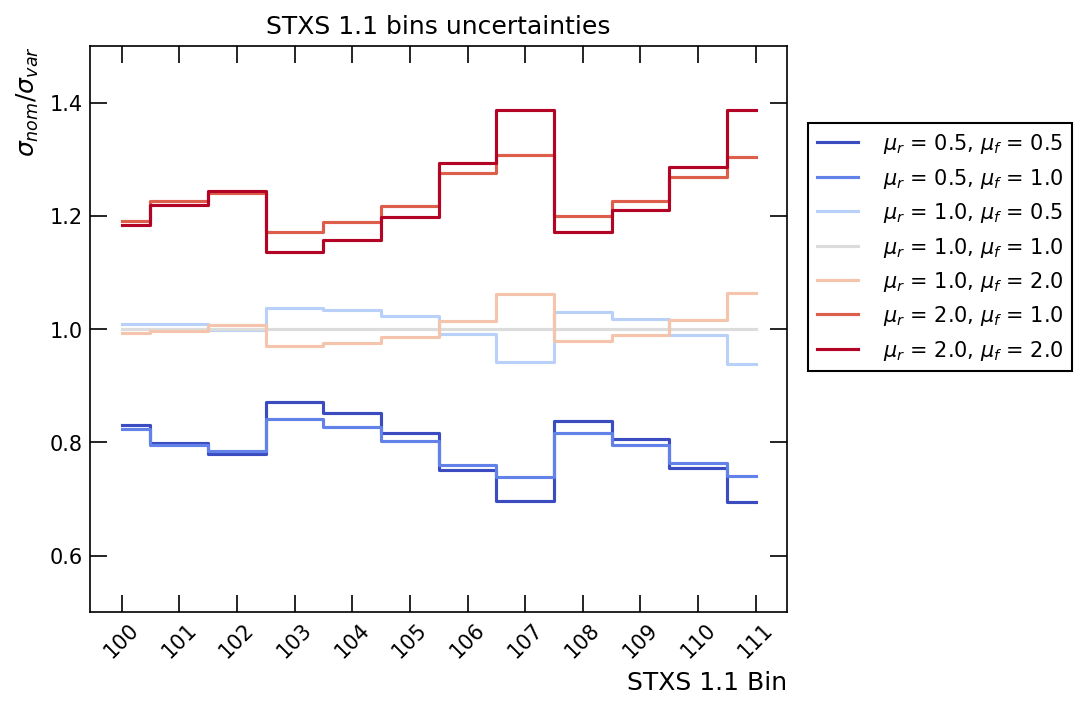

In [23]:
plt.figure(figsize = (6,5))
cmap = plt.cm.coolwarm(np.linspace(0, 1., 9.))
for i in range(9):
    if (i==2) | (i==6):
        continue
    plt.step(stxs_bins, histos[i], where = 'mid', label = scale_var[i], color = cmap[i], linewidth = 1.5)
    plt.grid(b = None)
plt.legend(bbox_to_anchor=(1., 0.9))
plt.xticks(stxs_bins, rotation = 45)
plt.tick_params(which='minor', length=0)
plt.ylim(0.5, 1.5)
plt.title('STXS 1.1 bins uncertainties')
plt.xlabel('STXS 1.1 Bin', ha='right', x=1.0, fontsize = 12)
plt.ylabel(r'$\sigma_{nom}/\sigma_{var}$', ha='right', y=1.0, fontsize = 12)